# лабораторная работа 3. Итеративные и рекурсивные алгоритмы

вариант 17

#### задание 1

Для решения данной задачи можно использовать рекурсивный алгоритм Евклида. Алгоритм Евклида заключается в следующем:

Найдите наибольший общий делитель первых двух чисел в последовательности.
Найденный наибольший общий делитель и следующее число в последовательности становятся первыми двумя числами.
Повторите шаги 1 и 2 для каждой пары соседних чисел в последовательности, пока не дойдете до конца последовательности.
Вот рекурсивный алгоритм нахождения наибольшего общего делителя последовательности N натуральных чисел, используя алгоритм Евклида:

In [1]:
def gcd_sequence(seq):
    if len(seq) == 1:
        return seq[0]
    else:
        gcd_of_two = gcd(seq[0], seq[1])
        return gcd_sequence([gcd_of_two] + seq[2:])

def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


В этом рекурсивном алгоритме функция gcd_sequence принимает список чисел seq и вызывает функцию gcd для нахождения наибольшего общего делителя первых двух чисел в списке. Затем она вызывает себя рекурсивно для последовательности, которая состоит из найденного наибольшего общего делителя и всех оставшихся чисел в списке seq. Функция gcd находит наибольший общий делитель двух чисел a и b с помощью алгоритма Евклида.

#### задание 2

In [2]:
def gcd_sequence_non_recursive(seq):
    result = seq[0]
    for i in range(1, len(seq)):
        result = gcd(result, seq[i])
        return result

# функция для вычисления наибольшего общего делителя
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a


В этом алгоритме функция gcd_sequence_non_recursive принимает список чисел seq и находит наибольший общий делитель всех чисел в последовательности, используя функцию gcd и итерацию в цикле for. Функция gcd находит наибольший общий делитель двух чисел a и b с помощью модифицированного алгоритма Евклида, использующего итеративный процесс.

#### задание 3

#### составьте блок-схему;

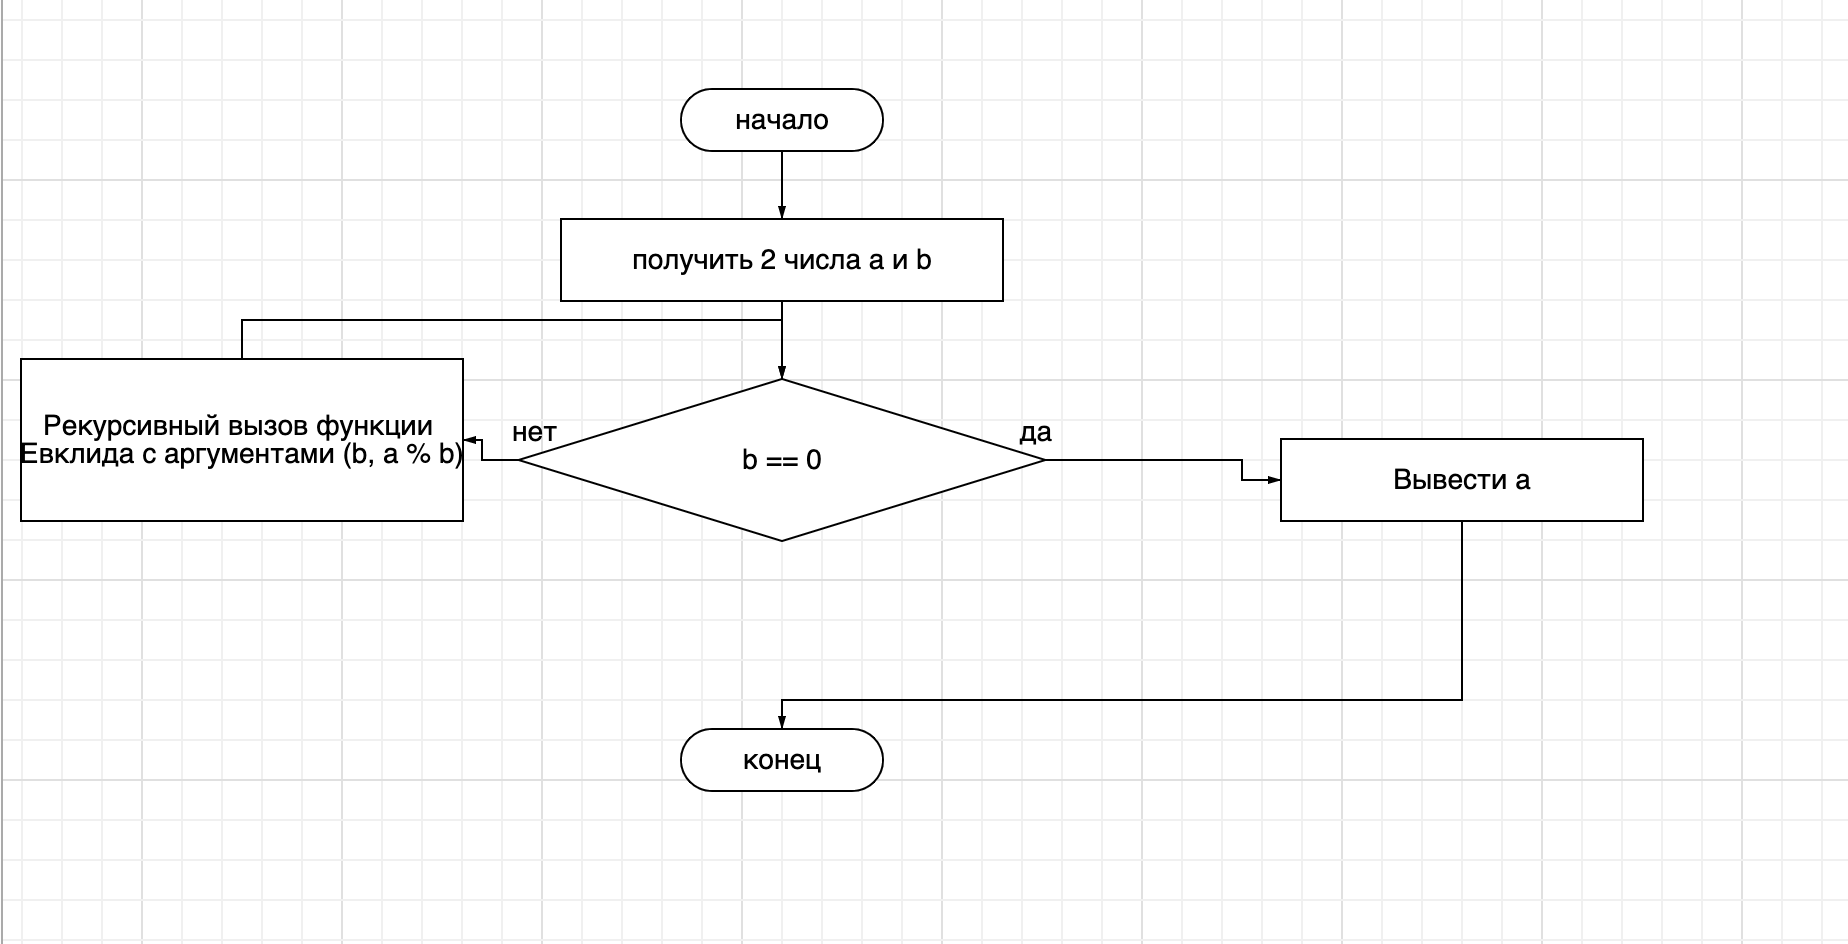

In [4]:
from IPython.display import Image
Image(filename='Desktop/03_17.png')
# используя рекурсию

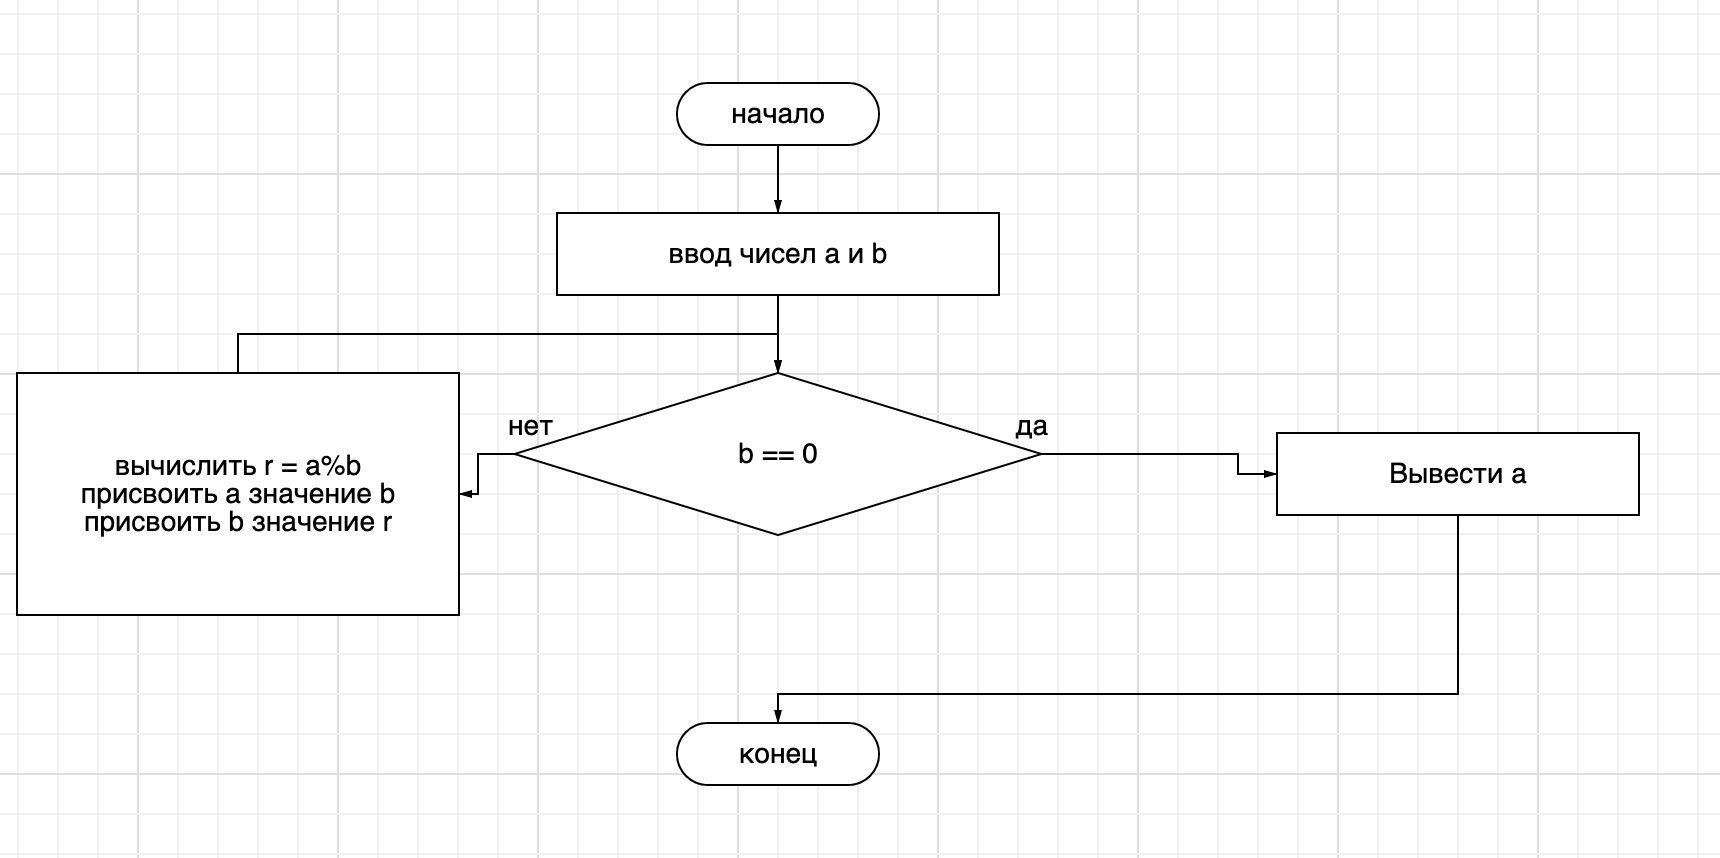

In [5]:
from IPython.display import Image
Image(filename='Desktop/03_17_2.png')
#без рекурсии

##### оцените верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов

В общем случае, верхняя граница размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов, зависит от доступной памяти и конкретной реализации языка программирования. Однако, можно оценить верхнюю границу размерности задачи, используя асимптотическую сложность алгоритма и размер доступной памяти.

В случае рекурсивного алгоритма нахождения наибольшего общего делителя последовательности N натуральных чисел с использованием алгоритма Евклида, асимптотическая сложность будет O(NlogM), где M - наибольшее число в последовательности.

Таким образом, при наличии достаточного количества памяти, можно рекурсивно находить наибольший общий делитель последовательности чисел, размер которой лежит в пределах указанной асимптотической сложности.



#### модернизируйте рекурсивную реализацию так, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также, с помощью декоратора @memoized);

In [3]:
# реализация вручную
def gcd_sequence(seq, memo=None):
    if memo is None:
        memo = {}

    if len(seq) == 1:
        return seq[0]

    key = tuple(seq)
    if key in memo:
        return memo[key]

    gcd_of_two = gcd(seq[0], seq[1])
    result = gcd_sequence([gcd_of_two] + seq[2:], memo)
    memo[key] = result
    return result


def gcd(a, b, memo=None):
    if memo is None:
        memo = {}

    if b == 0:
        return a

    key = (a, b)
    if key in memo:
        return memo[key]

    result = gcd(b, a % b, memo)
    memo[key] = result
    return result


In [4]:
# реализация с использованием @memoized:
def memoized(func):
    cache = {}
    def wrapper(*args):
        if args in cache:
            return cache[args]
        else:
            result = func(*args)
            cache[args] = result
            return result
    return wrapper

@memoized
def gcd_sequence(seq):
    if len(seq) == 1:
        return seq[0]
    else:
        gcd_of_two = gcd(seq[0], seq[1])
        return gcd_sequence([gcd_of_two] + seq[2:])

@memoized
def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


#### сравните производительность реализованных алгоритмов (количество итераций (соответственно вызовов рекурсии) подбирайте исходя из условий задачи)

In [3]:
import timeit

def gcd_recursive(numbers):
    if len(numbers) == 2:
        a, b = numbers
        return a if b == 0 else gcd_recursive([b, a % b])
    elif len(numbers) > 2:
        return gcd_recursive([numbers[0], gcd_recursive(numbers[1:])])

def gcd_non_recursive(numbers):
    a, b = numbers[0], numbers[1]
    while b != 0:
        a, b = b, a % b
    for n in numbers[2:]:
        a, b = a, n
        while b != 0:
            a, b = b, a % b
    return a

for n in [1000, 5000]:
    numbers = list(range(1, n+1))
    time_recursive = timeit.timeit(lambda: gcd_recursive(numbers), number=10)
    time_non_recursive = timeit.timeit(lambda: gcd_non_recursive(numbers), number=10)
    print(f"n={n}: recursive={time_recursive:.6f}s, non-recursive={time_non_recursive:.6f}s")




n=1000: recursive=0.032750s, non-recursive=0.001204s
n=5000: recursive=0.779037s, non-recursive=0.005690s


Из результатов замеров производительности можно сделать вывод, что алгоритм без рекурсии работает быстрее, чем рекурсивный алгоритм. Это связано с тем, что рекурсивный алгоритм при каждом вызове функции создает новый фрейм в стеке вызовов, что ведет к большим затратам памяти и времени на выполнение. В то же время алгоритм без рекурсии выполняется в рамках одного цикла, что существенно ускоряет его выполнение.